## **Possible Machine Learning problems can be approached:**

---

### 1. Multi-Class Classification Problem: Predicting Flight Delay Ratios
Problem: Build a multi-class classification model to predict the category of flight delays based on available features. Predict the delay ratio category of flights, indicating the percentage of flights delayed by 15+ minutes.

Target Variable: delay_ratio_category (Categories: 'no_delay', 'low', 'medium', 'high', 'very_high').

Features:

year, month, carrier, airport, arr_flights, carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct, arr_cancelled, arr_diverted.

Features to Drop:

arr_delay, carrier_name, airport_name, arr_diverted, arr_cancelled.

### 2. **Regression Problem: Predicting Arrival Delay (Minutes)**
   - **Problem Description**: This is a **regression problem** to predict the exact **number of minutes** by which a flight will be delayed.
   
   - **Target Variable**: `arr_delay` (The total accumulated arrival delay in minutes for all flights during the month).
   
   - **Features**: 
     - `year`
     - `month`
     - `carrier`
     - `airport`
     - `arr_flights`
     - `carrier_ct`
     - `weather_ct`
     - `nas_ct`
     - `security_ct`
     - `late_aircraft_ct`
     - `carrier_delay`
     - `weather_delay`
     - `nas_delay`
     - `security_delay`
     - `late_aircraft_delay`
   
   - **Features to Drop**:
     - `arr_del15` (since this is a classification target variable and is not directly useful for predicting the total delay in minutes).
     - `arr_diverted` and `arr_cancelled` (if they aren't directly relevant to the delay itself).

---

### 3. **Classification Problem: Predicting Flight Cancellations**
   - **Problem Description**: You can predict whether a flight will be **canceled** during a specific month, which is useful for operational planning in the airline industry.
   
   - **Target Variable**: `arr_cancelled` (The total number of canceled flights in a month, treated as a binary variable—whether cancellations occurred or not).
   
   - **Features**:
     - `year`
     - `month`
     - `carrier`
     - `airport`
     - `arr_flights`
     - `carrier_ct`
     - `weather_ct`
     - `nas_ct`
     - `security_ct`
     - `late_aircraft_ct`
     - `arr_del15`
   
   - **Features to Drop**:
     - `arr_diverted` (unless you consider diversions as a factor for cancellations).
     - `arr_delay` (unless you treat delay as a contributing factor for cancellations).
   
---

### 4. **Multi-class Classification: Predicting the Cause of Delays**
   - **Problem Description**: A multi-class classification model can help predict the cause of delays (e.g., whether delays are caused by the carrier, weather, NAS, security, or late aircraft). This can help airlines improve operational strategies to address specific delay factors.
   
   - **Target Variable**: Derived variable with multiple classes for delay causes, such as:
     - `carrier_delay`
     - `weather_delay`
     - `nas_delay`
     - `security_delay`
     - `late_aircraft_delay`
   
   - **Features**:
     - `year`
     - `month`
     - `carrier`
     - `airport`
     - `arr_flights`
     - `arr_del15`
     - `arr_cancelled`
     - `arr_diverted`
   
   - **Features to Drop**:
     - `arr_delay` (since it represents the cumulative delay and is not relevant for classifying the cause).
   
---

### 5. **Time Series Forecasting: Predicting Future Delays**
   - **Problem Description**: Use historical flight performance data to predict future delays. This is particularly useful for airlines or airport management to anticipate trends and manage resources efficiently.
   
   - **Target Variable**: `arr_delay` (or `arr_del15`, depending on the focus—whether you want to predict total delays or whether delays will exceed 15 minutes).
   
   - **Features**:
     - Previous values of `arr_delay` or `arr_del15` (using time-series lag features).
     - `year`, `month`, `carrier`, `airport` (time-related features).
     - Delays due to factors like `carrier_delay`, `weather_delay`, etc., from previous months to use as predictive features.
   
   - **Features to Drop**:
     - Time-based features like `year` and `month` could be engineered into time-lag features (e.g., rolling averages, time-based lags).

---

### Additional Notes on Feature Engineering:
- **Correlation between delay-related features**: 
  - Features such as `carrier_delay`, `weather_delay`, `nas_delay`, `security_delay`, and `late_aircraft_delay` may be highly correlated with `arr_delay` and each other. You could either choose one or two of these features for modeling or use dimensionality reduction techniques to combine them.
  
- **Handling Missing or Zero Values**: 
  - Columns like `arr_cancelled`, `arr_diverted`, `security_ct`, and `weather_ct` may have zeros or missing values, which may need to be addressed through imputation, aggregation, or by marking them as categorical features.
  
---

### General Features to Drop:
- **`carrier_name`** and **`airport_name`**: These can be dropped and replaced by the corresponding `carrier` and `airport` codes since the codes are more suitable for machine learning models.
- **`arr_diverted`** and **`arr_cancelled`**: These can often be omitted unless specifically predicting cancellations or diversions. 
- **`arr_delay`**: For classification models, this might be omitted in favor of the binary `arr_del15`. For regression models, `arr_delay` is central to prediction.



## Problem Statement
---

### Project Objective:
Develop a machine learning model to predict airline delays and analyze factors affecting on-time performance using historical data. By exploring patterns and correlations in flight records, this model will forecast both the likelihood and duration of delays. The ultimate goal is to provide airlines with actionable insights to optimize schedules, enhance operational efficiency, and improve customer satisfaction.

### Keywords:
Airline delays, Flight performance prediction, Machine learning, Delay analysis, Predictive Modeling, Classification, Regression, Data preprocessing, Feature engineering, Time series analysis

### Dataset Information:
- **Source**: U.S. Bureau of Transportation Statistics ([BTS](https://www.transtats.bts.gov)) Airline On-Time Performance Data. Click [here](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) to download the dataset
- **Features**: The dataset includes flight details such as year, month, carrier, airport, and airport_name. It also contains arrival-related data and causes of delay. Additional columns include arr_cancelled, arr_diverted, arr_delay, and various delay times (carrier_delay, weather_delay, etc.).
- **Size**: Hundreds of thousands of records spanning from `June 2003` to `December 2024`.

### Evaluation Metrics:  
- **For Classification (Delay Prediction)**: Accuracy, Precision, Recall, F1-Score, Confusion Matrix, ROC AUC, Log Loss  
- **For Regression (Delay Duration)**: MAE, MSE, RMSE, R-squared, MAPE  
- **For Time Series (Forecasting Delays)**: MASE, sMAPE, Forecast Bias


### Research Questions to Address:

#### **Classification Problems**
1. What factors contribute to flight delays of 15 minutes or more?
2. Can we predict whether a flight will be delayed by 15 minutes or more?
3. How accurate are predictions of flight delays based on carrier-specific data?
4. What are the main reasons behind flight cancellations and diversions?
5. Can we predict flight cancellations or diversions before they occur?

#### **Regression Problems**
6. How much of the delay is caused by weather-related factors?
7. Which weather patterns contribute most to flight delays?
8. Which carriers experience the most delays, cancellations, and diversions?
9. How does the number of flights a carrier operates affect its delay performance?
10. Which airports are most likely to experience delays?
11. How do airport-specific factors correlate with delays and diversions?

#### **Time Series and Forecasting**
12. What are the seasonal trends in flight delays?
13. Can we forecast future flight delays based on historical data?

#### **Operational Efficiency and Analysis**
14. How effective are operational strategies in reducing flight delays?
15. What operational or environmental factors lead to the highest delays?

#### **Airport-Specific Analysis**
16. Why do some airports experience more severe delays than others?
17. What impact do airport-specific factors have on delays?

## Import Libraries

In [1]:
# Importing basic libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Importing libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# For handling warnings (if needed)
import warnings
warnings.filterwarnings('ignore')

# Importing Time Series specific evaluation metrics (for forecasting)
from sklearn.metrics import mean_absolute_percentage_error as mape

# To adjust dates to the last day of the month
from pandas.tseries.offsets import MonthEnd


## About Dataset

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Monthly summaries of flight performance, such as the number of on-time, delayed, canceled, and diverted flights, are provided in DOT's **Air Travel Consumer Report**, published approximately 30 days after each month ends. Additionally, BTS releases summary tables on their website. Since June 2003, BTS has also been collecting data on the causes of flight delays.

### Dataset Columns:

- **year**: Year in YYYY format.
- **month**: Month in MM format (1-12).
- **carrier**: Code assigned by the U.S. DOT to uniquely identify an airline carrier.
- **carrier_name**: The full name of the airline carrier, defined as one holding and reporting under the same DOT certificate, regardless of its code, name, or parent company.
- **airport**: A three-character alphanumeric code issued by the U.S. DOT, designating the airport.
- **airport_name**: The official name of an airport, where aircraft operate, typically with paved runways, maintenance facilities, and terminals.
- **arr_flights**: Total number of arrival flights.
- **arr_del15**: Arrival delay indicator (15 minutes or more). A flight is considered delayed if its actual arrival time exceeds the scheduled time by 15 minutes or more.
- **carrier_ct**: Number of delays caused by the airline (carrier).
- **weather_ct**: Number of delays caused by weather-related factors.
- **nas_ct**: Number of delays caused by the National Air System (NAS).
- **security_ct**: Number of delays caused by security-related issues.
- **late_aircraft_ct**: Number of delays caused by late-arriving aircraft.
- **arr_cancelled**: Indicates whether the flight was canceled.
- **arr_diverted**: Indicates whether the flight was diverted.
- **arr_delay**: The difference (in minutes) between the scheduled and actual arrival time. Negative values indicate early arrivals.
- **carrier_delay**: The delay, in minutes, caused by the airline carrier.
- **weather_delay**: The delay, in minutes, caused by weather conditions.
- **nas_delay**: The delay, in minutes, caused by the National Air System.
- **security_delay**: The delay, in minutes, caused by security-related issues.
- **late_aircraft_delay**: The delay, in minutes, caused by late-arriving aircraft.

In [2]:
url = 'https://raw.githubusercontent.com/GopinathAchuthan/Airline-On-Time-Performance-and-Delay-Prediction/refs/heads/main/Dataset/Airline_Delay_Cause.csv'

In [3]:
raw_data = pd.read_csv(url)
raw_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


In [4]:
raw_data.iloc[6]

year                                                       2024
month                                                        12
carrier                                                      MQ
carrier_name                                          Envoy Air
airport                                                     FWA
airport_name           Fort Wayne, IN: Fort Wayne International
arr_flights                                                90.0
arr_del15                                                  16.0
carrier_ct                                                 4.33
weather_ct                                                 1.45
nas_ct                                                     6.07
security_ct                                                 0.0
late_aircraft_ct                                           4.14
arr_cancelled                                               0.0
arr_diverted                                                0.0
arr_delay                               

In [5]:
# Renaming columns with more meaningful names
raw_data.rename(columns={
    'year': 'year',
    'month': 'month',
    'carrier': 'carrier_code',
    'carrier_name': 'carrier_name',
    'airport': 'airport_code',
    'airport_name': 'airport_name',
    'arr_flights': 'total_arrival_flights_count',
    'arr_del15': 'total_delayed_flights_15_min',
    'carrier_ct': 'avg_carrier_delay_count',
    'weather_ct': 'avg_weather_delay_count',
    'nas_ct': 'avg_nas_delay_count',
    'security_ct': 'avg_security_delay_count',
    'late_aircraft_ct': 'avg_late_aircraft_count',
    'arr_cancelled': 'total_flights_cancelled',
    'arr_diverted': 'total_flights_diverted',
    'arr_delay': 'total_arrival_delay_in_min', 
    'carrier_delay': 'total_carrier_delay_in_min',
    'weather_delay': 'total_weather_delay_in_min',
    'nas_delay': 'total_nas_delay_in_min',
    'security_delay': 'total_security_delay_in_min',
    'late_aircraft_delay': 'total_late_aircraft_delay_in_min'
}, inplace=True)

# Checking the renamed columns
raw_data.columns

Index(['year', 'month', 'carrier_code', 'carrier_name', 'airport_code',
       'airport_name', 'total_arrival_flights_count',
       'total_delayed_flights_15_min', 'avg_carrier_delay_count',
       'avg_weather_delay_count', 'avg_nas_delay_count',
       'avg_security_delay_count', 'avg_late_aircraft_count',
       'total_flights_cancelled', 'total_flights_diverted',
       'total_arrival_delay_in_min', 'total_carrier_delay_in_min',
       'total_weather_delay_in_min', 'total_nas_delay_in_min',
       'total_security_delay_in_min', 'total_late_aircraft_delay_in_min'],
      dtype='object')

#### **Column Renaming and Descriptions for raw_data DataFrame**:

| **Old Column**        | **New Column**                  | **Description**                                                                                                                                                    |
|----------------------------|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| year                       | year                                 | The year the data corresponds to (e.g., `2024`).                                                                                                                   |
| month                      | month                                | The month the data corresponds to, in MM format (e.g., `12` for December). Each data row represents a specific month.                                             |
| carrier                    | carrier_code                         | The airline’s code assigned by the U.S. Department of Transportation (DOT) (e.g., `MQ` for Envoy Air).                                                           |
| carrier_name               | carrier_name                         | The full name of the airline corresponding to the carrier code (e.g., `Envoy Air`).                                                                              |
| airport                    | airport_code                         | The airport's three-character code as assigned by the DOT (e.g., `EVV` for Evansville Regional Airport).                                                        |
| airport_name               | airport_name                         | The full name and location of the airport (e.g., `Evansville, IN: Evansville Regional`).                                                                          |
| arr_flights                | total_arrival_flights_count          | The total number of arrival flights to the airport during the specified month (e.g., `61.0`).                                                                    |
| arr_del15                  | total_delayed_flights_15_min         | The number of flights delayed by 15 minutes or more during the month (e.g., `9.0`).                                                                               |
| carrier_ct                 | avg_carrier_delay_count              | The average delay in minutes caused by the airline carrier across all flights in the month (e.g., `1.52` minutes).                                                |
| weather_ct                 | avg_weather_delay_count              | The average delay in minutes caused by weather conditions across all flights in the month (e.g., `1.08` minutes).                                                |
| nas_ct                     | avg_nas_delay_count                  | The average delay in minutes caused by National Air System (NAS) factors like air traffic control and airport congestion during the month (e.g., `0.56` minutes). |
| security_ct                | avg_security_delay_count             | The average delay in minutes caused by security-related issues (e.g., `0.0` indicating no security-related delays during the month).                              |
| late_aircraft_ct           | avg_late_aircraft_count              | The average delay in minutes caused by late-arriving aircraft (e.g., `5.84` minutes).                                                                            |
| arr_cancelled              | total_flights_cancelled              | The total number of canceled flights during the month (e.g., `0.0` indicating no cancellations).                                                                |
| arr_diverted               | total_flights_diverted               | The total number of diverted flights during the month (e.g., `0.0` indicating no diversions).                                                                   |
| arr_delay                  | total_arrival_delay_in_min           | The total accumulated arrival delay in minutes for all flights during the month (e.g., `732.0` minutes).                                                         |
| carrier_delay              | total_carrier_delay_in_min           | The total accumulated delay in minutes caused by the airline carrier during the month (e.g., `47.0` minutes).                                                    |
| weather_delay              | total_weather_delay_in_min           | The total accumulated delay in minutes caused by weather conditions during the month (e.g., `90.0` minutes).                                                    |
| nas_delay                  | total_nas_delay_in_min               | The total accumulated delay in minutes caused by National Air System (NAS) factors during the month (e.g., `19.0` minutes).                                     |
| security_delay             | total_security_delay_in_min          | The total accumulated delay in minutes caused by security issues during the month (e.g., `0.0` minutes).                                                        |
| late_aircraft_delay        | total_late_aircraft_delay_in_min     | The total accumulated delay in minutes caused by late-arriving aircraft during the month (e.g., `576.0` minutes, the largest contributor to delays).              |


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396317 entries, 0 to 396316
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              396317 non-null  int64  
 1   month                             396317 non-null  int64  
 2   carrier_code                      396317 non-null  object 
 3   carrier_name                      396317 non-null  object 
 4   airport_code                      396317 non-null  object 
 5   airport_name                      396317 non-null  object 
 6   total_arrival_flights_count       395660 non-null  float64
 7   total_delayed_flights_15_min      395367 non-null  float64
 8   avg_carrier_delay_count           395660 non-null  float64
 9   avg_weather_delay_count           395660 non-null  float64
 10  avg_nas_delay_count               395660 non-null  float64
 11  avg_security_delay_count          395660 non-null  f

In [7]:
raw_data.shape

(396317, 21)

## Data Preprocessing

In [8]:
'''
Checking for missing data
'''
missing_data = raw_data.isnull().sum()
missing_data

year                                  0
month                                 0
carrier_code                          0
carrier_name                          0
airport_code                          0
airport_name                          0
total_arrival_flights_count         657
total_delayed_flights_15_min        950
avg_carrier_delay_count             657
avg_weather_delay_count             657
avg_nas_delay_count                 657
avg_security_delay_count            657
avg_late_aircraft_count             657
total_flights_cancelled             657
total_flights_diverted              657
total_arrival_delay_in_min          657
total_carrier_delay_in_min          657
total_weather_delay_in_min          657
total_nas_delay_in_min              657
total_security_delay_in_min         657
total_late_aircraft_delay_in_min    657
dtype: int64

In [9]:
# Filter the rows with missing data in any column
rows_with_missing_data = raw_data[raw_data.isnull().any(axis=1)]

In [10]:
# Display the top/bottom 5 rows with missing data
rows_with_missing_data.head()
# rows_with_missing_data.tail()

,year,month,carrier_code,carrier_name,airport_code,airport_name,total_arrival_flights_count,total_delayed_flights_15_min,avg_carrier_delay_count,avg_weather_delay_count,...,avg_security_delay_count,avg_late_aircraft_count,total_flights_cancelled,total_flights_diverted,total_arrival_delay_in_min,total_carrier_delay_in_min,total_weather_delay_in_min,total_nas_delay_in_min,total_security_delay_in_min,total_late_aircraft_delay_in_min
1292,2024,12,C5,CommuteAir LLC dba CommuteAir,AUS,"Austin, TX: Austin - Bergstrom International",1.0,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,2024,12,G4,Allegiant Air,BTV,"Burlington, VT: Burlington International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2305,2024,11,C5,CommuteAir LLC dba CommuteAir,DAY,"Dayton, OH: James M Cox/Dayton International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4983,2024,10,C5,CommuteAir LLC dba CommuteAir,PVD,"Providence, RI: Rhode Island Tf Green Internat...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6455,2024,9,G7,GoJet Airlines LLC d/b/a United Express,HHH,"Hilton Head, SC: Hilton Head Airport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The missing data is spread across the dataset, which means that the missing values are scattered in various rows and columns instead of being concentrated in a continuous block or set of consecutive rows.

In [11]:
# Drop rows with missing data in any column
raw_data = raw_data.dropna().reset_index(drop=True)

In [12]:
'''
Check for duplicate
'''
# Count the number of duplicate rows
duplicate_count = raw_data.duplicated().sum()

# Print the count of duplicates
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [13]:
'''
Create a 'date' column using 'year' and 'month'
'''
# Create a 'date' column using 'year' and 'month', defaulting to the 1st of the month
raw_data['date'] = pd.to_datetime(raw_data['year'].astype(str) + '-' + raw_data['month'].astype(str) + '-01')

# Shift the date to the end of the month
raw_data['date'] = raw_data['date'] + MonthEnd(0)

In [14]:
'''
Create a 'delayed_flights_15_mins_ratio' using 'total_delayed_flights_15_min' and 'total_arrival_flights_count'
'''
raw_data['delayed_flights_15_mins_ratio'] = raw_data['total_delayed_flights_15_min'] / raw_data['total_arrival_flights_count']

In [15]:
'''
Data Summary Statistics
'''
# Get the summary statistics for the numeric columns
numeric_columns = ['total_arrival_flights_count', 'total_delayed_flights_15_min', 'delayed_flights_15_mins_ratio',
                   'avg_carrier_delay_count', 'avg_weather_delay_count', 'avg_nas_delay_count', 'avg_security_delay_count', 
                   'avg_late_aircraft_count', 'total_flights_cancelled', 'total_flights_diverted', 'total_arrival_delay_in_min', 
                   'total_carrier_delay_in_min', 'total_weather_delay_in_min', 'total_nas_delay_in_min', 
                   'total_security_delay_in_min', 'total_late_aircraft_delay_in_min'
                  ]


numeric_summary = raw_data[numeric_columns].describe()

full_stats = numeric_summary.transpose()

# Adding skewness and kurtosis for each column
full_stats['skewness'] = numeric_summary.skew()
full_stats['kurtosis'] = numeric_summary.kurt()

# Display the full summary
full_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
total_arrival_flights_count,395367.0,362.163499,994.698831,1.00,56.000000,113.000000,255.000000,21977.00,2.811957,7.927255
total_delayed_flights_15_min,395367.0,69.653985,193.756198,0.00,8.000000,21.000000,52.000000,6377.00,2.827015,7.993935
delayed_flights_15_mins_ratio,395367.0,0.197986,0.114654,0.00,0.121951,0.184932,0.258065,1.00,2.828427,8.000000
avg_carrier_delay_count,395367.0,20.564053,48.323305,0.00,2.800000,7.530000,18.680000,1886.58,2.828303,7.999472
avg_weather_delay_count,395367.0,2.508879,9.576550,0.00,0.000000,0.510000,2.000000,717.94,2.828409,7.999923
avg_nas_delay_count,395367.0,22.250508,79.605857,-0.01,1.400000,4.920000,14.010000,4091.27,2.827841,7.997492
avg_security_delay_count,395367.0,0.172902,0.827035,0.00,0.000000,0.000000,0.000000,80.56,2.828427,7.999999
avg_late_aircraft_count,395367.0,24.157677,74.517513,0.00,1.520000,5.510000,16.180000,2588.13,2.828193,7.999004
total_flights_cancelled,395367.0,6.774319,35.077934,0.00,0.000000,1.000000,4.000000,4951.00,2.827563,7.996299
total_flights_diverted,395367.0,0.835391,3.799773,0.00,0.000000,0.000000,1.000000,256.00,2.828425,7.999990


In [16]:
'''
Count the number of zeros and non-zeros values in each column.
'''
# Define the list of numeric columns
numeric_columns = ['total_arrival_flights_count', 'total_delayed_flights_15_min', 'delayed_flights_15_mins_ratio',
                   'avg_carrier_delay_count', 'avg_weather_delay_count', 'avg_nas_delay_count', 'avg_security_delay_count', 
                   'avg_late_aircraft_count', 'total_flights_cancelled', 'total_flights_diverted', 'total_arrival_delay_in_min', 
                   'total_carrier_delay_in_min', 'total_weather_delay_in_min', 'total_nas_delay_in_min', 
                   'total_security_delay_in_min', 'total_late_aircraft_delay_in_min'
                  ]

# Count the number of zeros and non-zeros
zero_counts = raw_data[numeric_columns].apply(lambda x: (x == 0).sum())
non_zero_counts = raw_data[numeric_columns].apply(lambda x: (x != 0).sum())

# Calculate the ratio of zeros to non-zeros
zero_to_non_zero_ratio = zero_counts / non_zero_counts

# Combine the results into a single DataFrame for better readability
result = pd.DataFrame({
    'zeros': zero_counts,
    'non_zeros': non_zero_counts,
    'zero_to_non_zero_ratio': zero_to_non_zero_ratio
})

result

,zeros,non_zeros,zero_to_non_zero_ratio
total_arrival_flights_count,0,395367,0.000000
total_delayed_flights_15_min,12689,382678,0.033158
delayed_flights_15_mins_ratio,12689,382678,0.033158
avg_carrier_delay_count,23723,371644,0.063833
avg_weather_delay_count,162347,233020,0.696708
avg_nas_delay_count,40618,354749,0.114498
avg_security_delay_count,344720,50647,6.806326
avg_late_aircraft_count,49922,345445,0.144515
total_flights_cancelled,167562,227805,0.735550
total_flights_diverted,288810,106557,2.710380


In [17]:
'''
Create a 'delay_ratio_category' column based on the distribution of delayed_flights_15_mins_ratio.
'''
# Define bins and categories based on the distribution of delayed_flights_15_mins_ratio
bins = [-1, 0, 0.10, 0.20, 0.40, 1.00]  # Bins based on observed statistics
labels = ['no_delay', 'low', 'medium', 'high', 'very_high']  # Categories

# Categorize the `delayed_flights_15_mins_ratio` values into the defined bins
raw_data['delay_ratio_category'] = pd.cut(raw_data['delayed_flights_15_mins_ratio'], bins=bins, labels=labels, right=True)

In [18]:
raw_data.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,total_arrival_flights_count,total_delayed_flights_15_min,avg_carrier_delay_count,avg_weather_delay_count,...,total_flights_diverted,total_arrival_delay_in_min,total_carrier_delay_in_min,total_weather_delay_in_min,total_nas_delay_in_min,total_security_delay_in_min,total_late_aircraft_delay_in_min,date,delayed_flights_15_mins_ratio,delay_ratio_category
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,732.0,47.0,90.0,19.0,0.0,576.0,2024-12-31,0.147541,medium
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0,2024-12-31,0.392523,high
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,3.0,1596.0,143.0,52.0,468.0,0.0,933.0,2024-12-31,0.183432,medium
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0,2024-12-31,0.204678,high
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,720.0,86.0,154.0,191.0,0.0,289.0,2024-12-31,0.202899,high


## Exploratory Data Analysis (EDA)

In [19]:
# Define Numeric and Categorical Features
numeric_features = ['total_arrival_flights_count', 'total_delayed_flights_15_min', 'delayed_flights_15_mins_ratio', 
                       'avg_carrier_delay_count', 'avg_weather_delay_count', 
                       'avg_nas_delay_count','avg_security_delay_count', 'avg_late_aircraft_count',
                       'total_flights_cancelled', 'total_flights_diverted',
                       'total_arrival_delay_in_min', 'total_carrier_delay_in_min', 'total_weather_delay_in_min', 
                       'total_nas_delay_in_min', 'total_security_delay_in_min', 'total_late_aircraft_delay_in_min'
                      ]
# categorical_features = ['carrier_code', 'carrier_name', 'airport_code', 'airport_name', 'delay_ratio_category']
categorical_features = ['carrier_code', 'airport_code', 'delay_ratio_category']

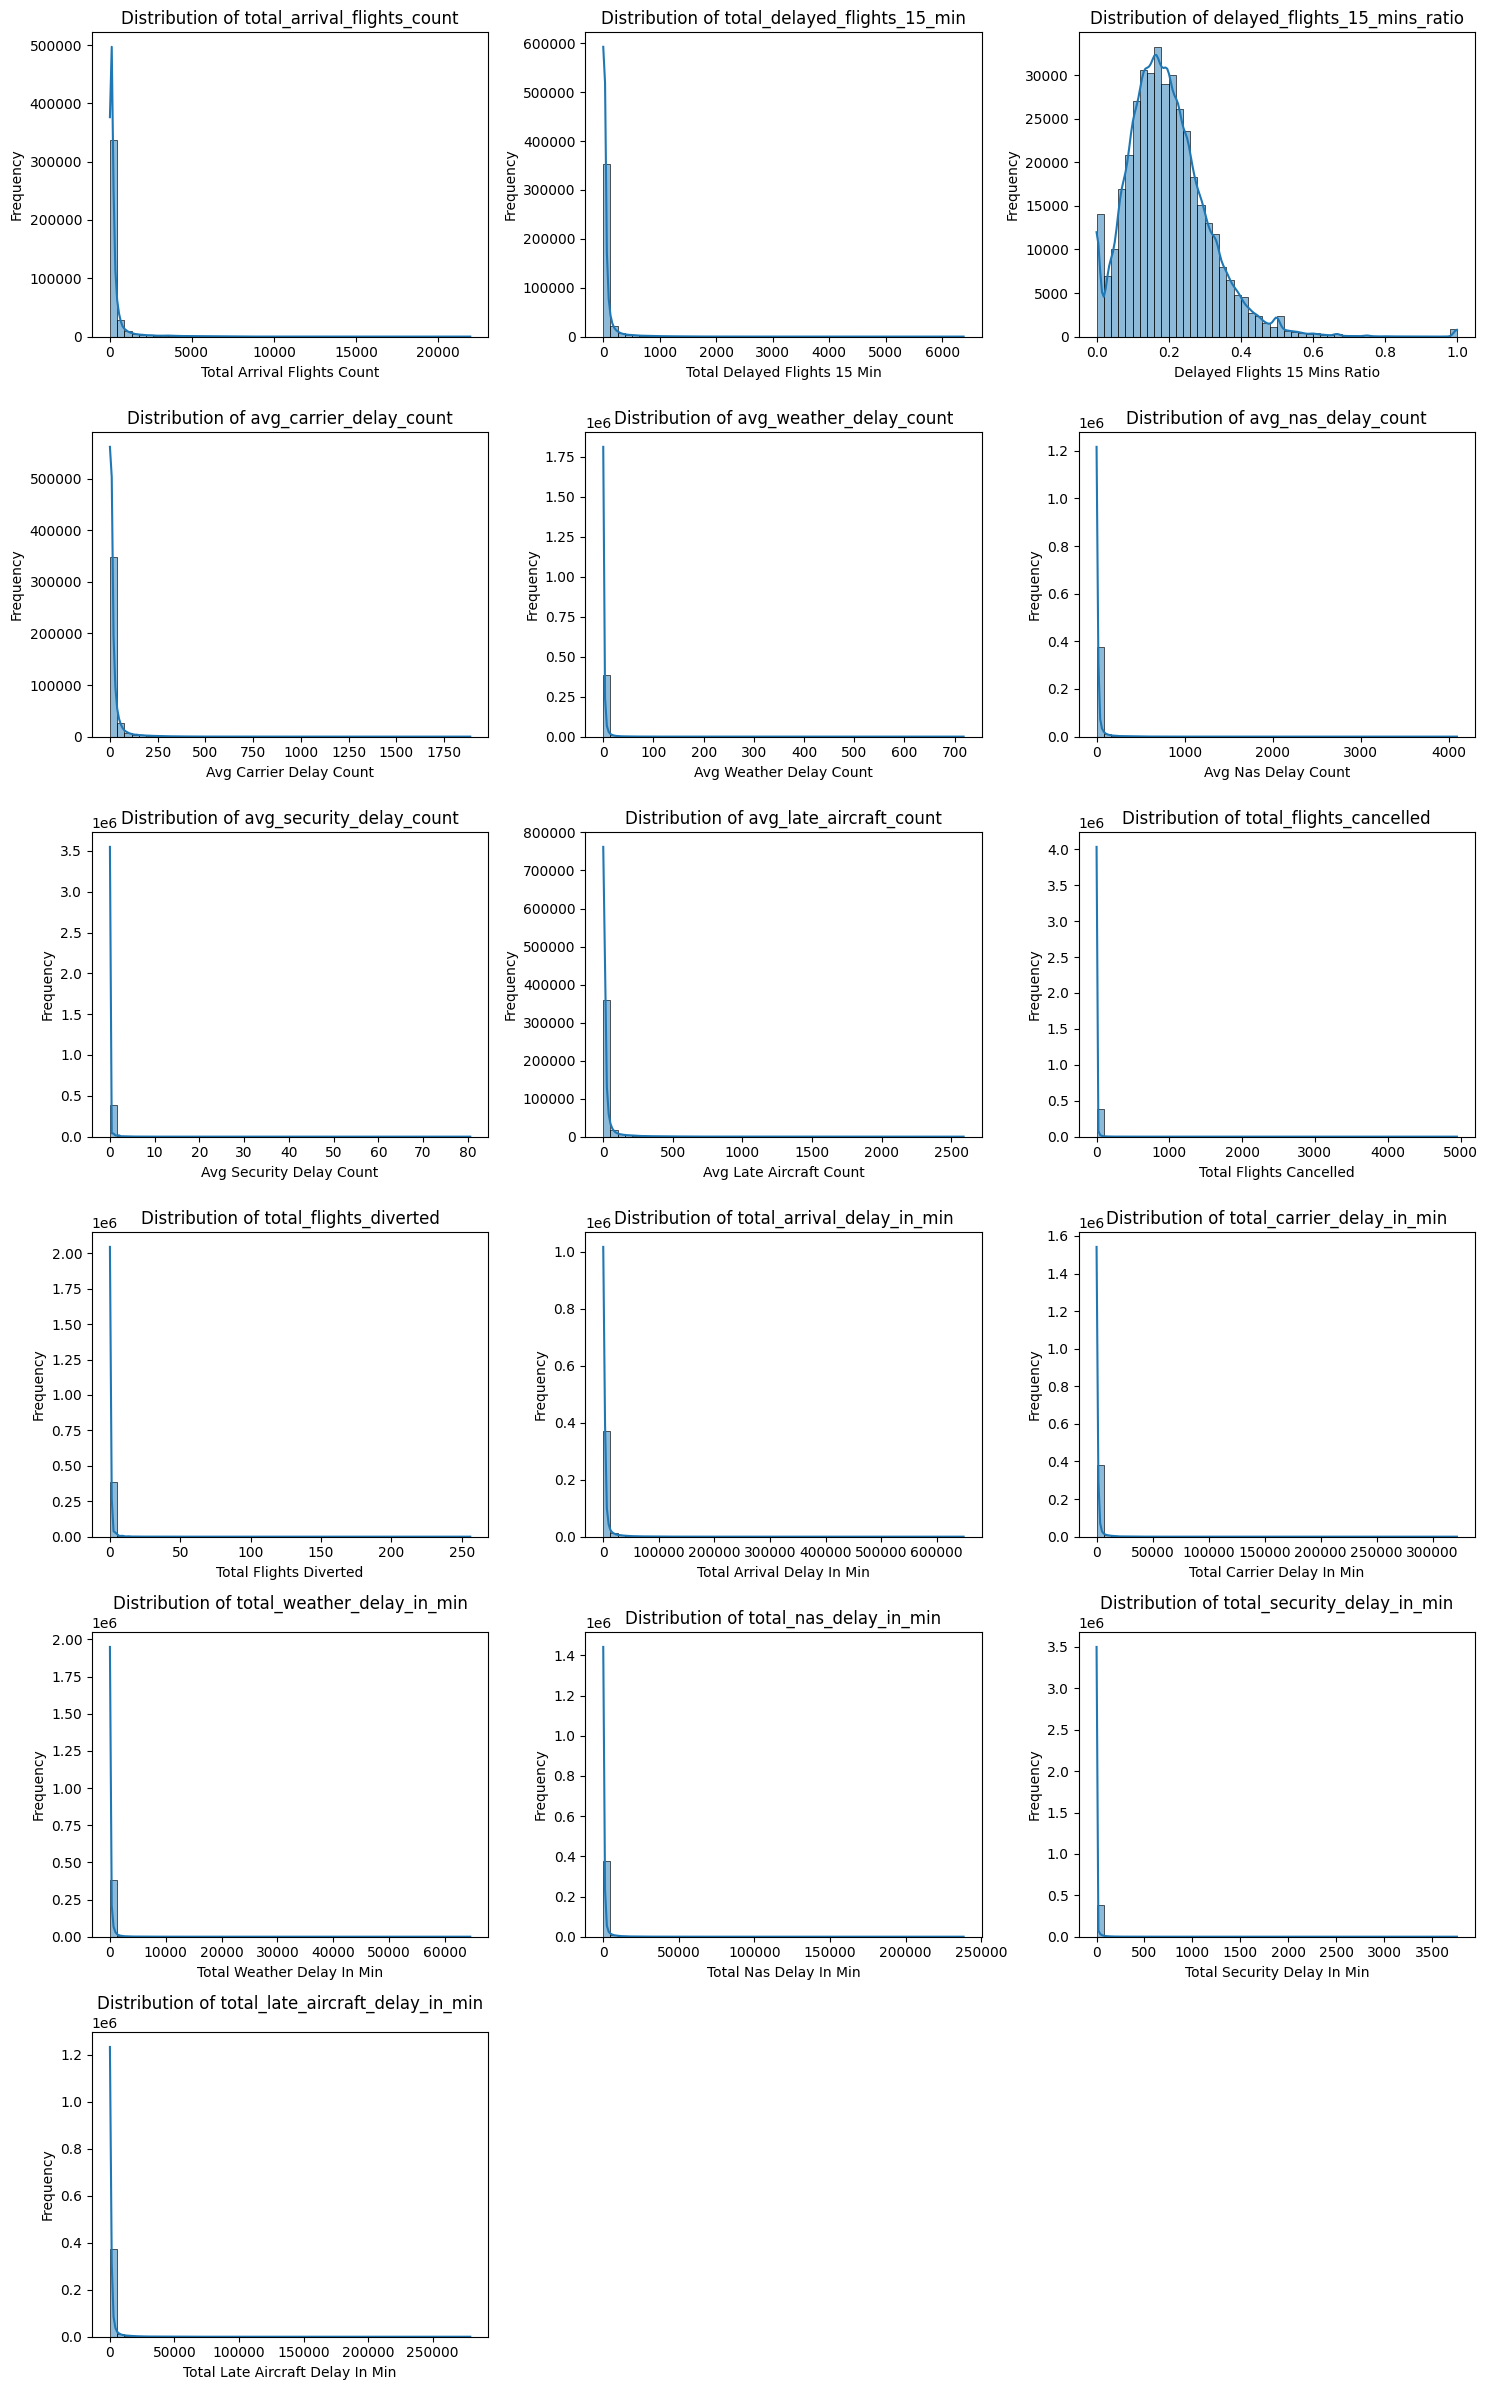

In [34]:
'''
Using histograms to understand the distribution of continuous numerical features.
'''

# Number of rows and columns for the subplot grid
count_num_features = len(numeric_features)
cols = 3
rows = (count_num_features // cols) + (count_num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Loop over each feature and plot on the corresponding axis
for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    sns.histplot(raw_data[feature], bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    x_label_name = ' '.join(word.capitalize() for word in feature.split('_'))
    ax.set_xlabel(x_label_name)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

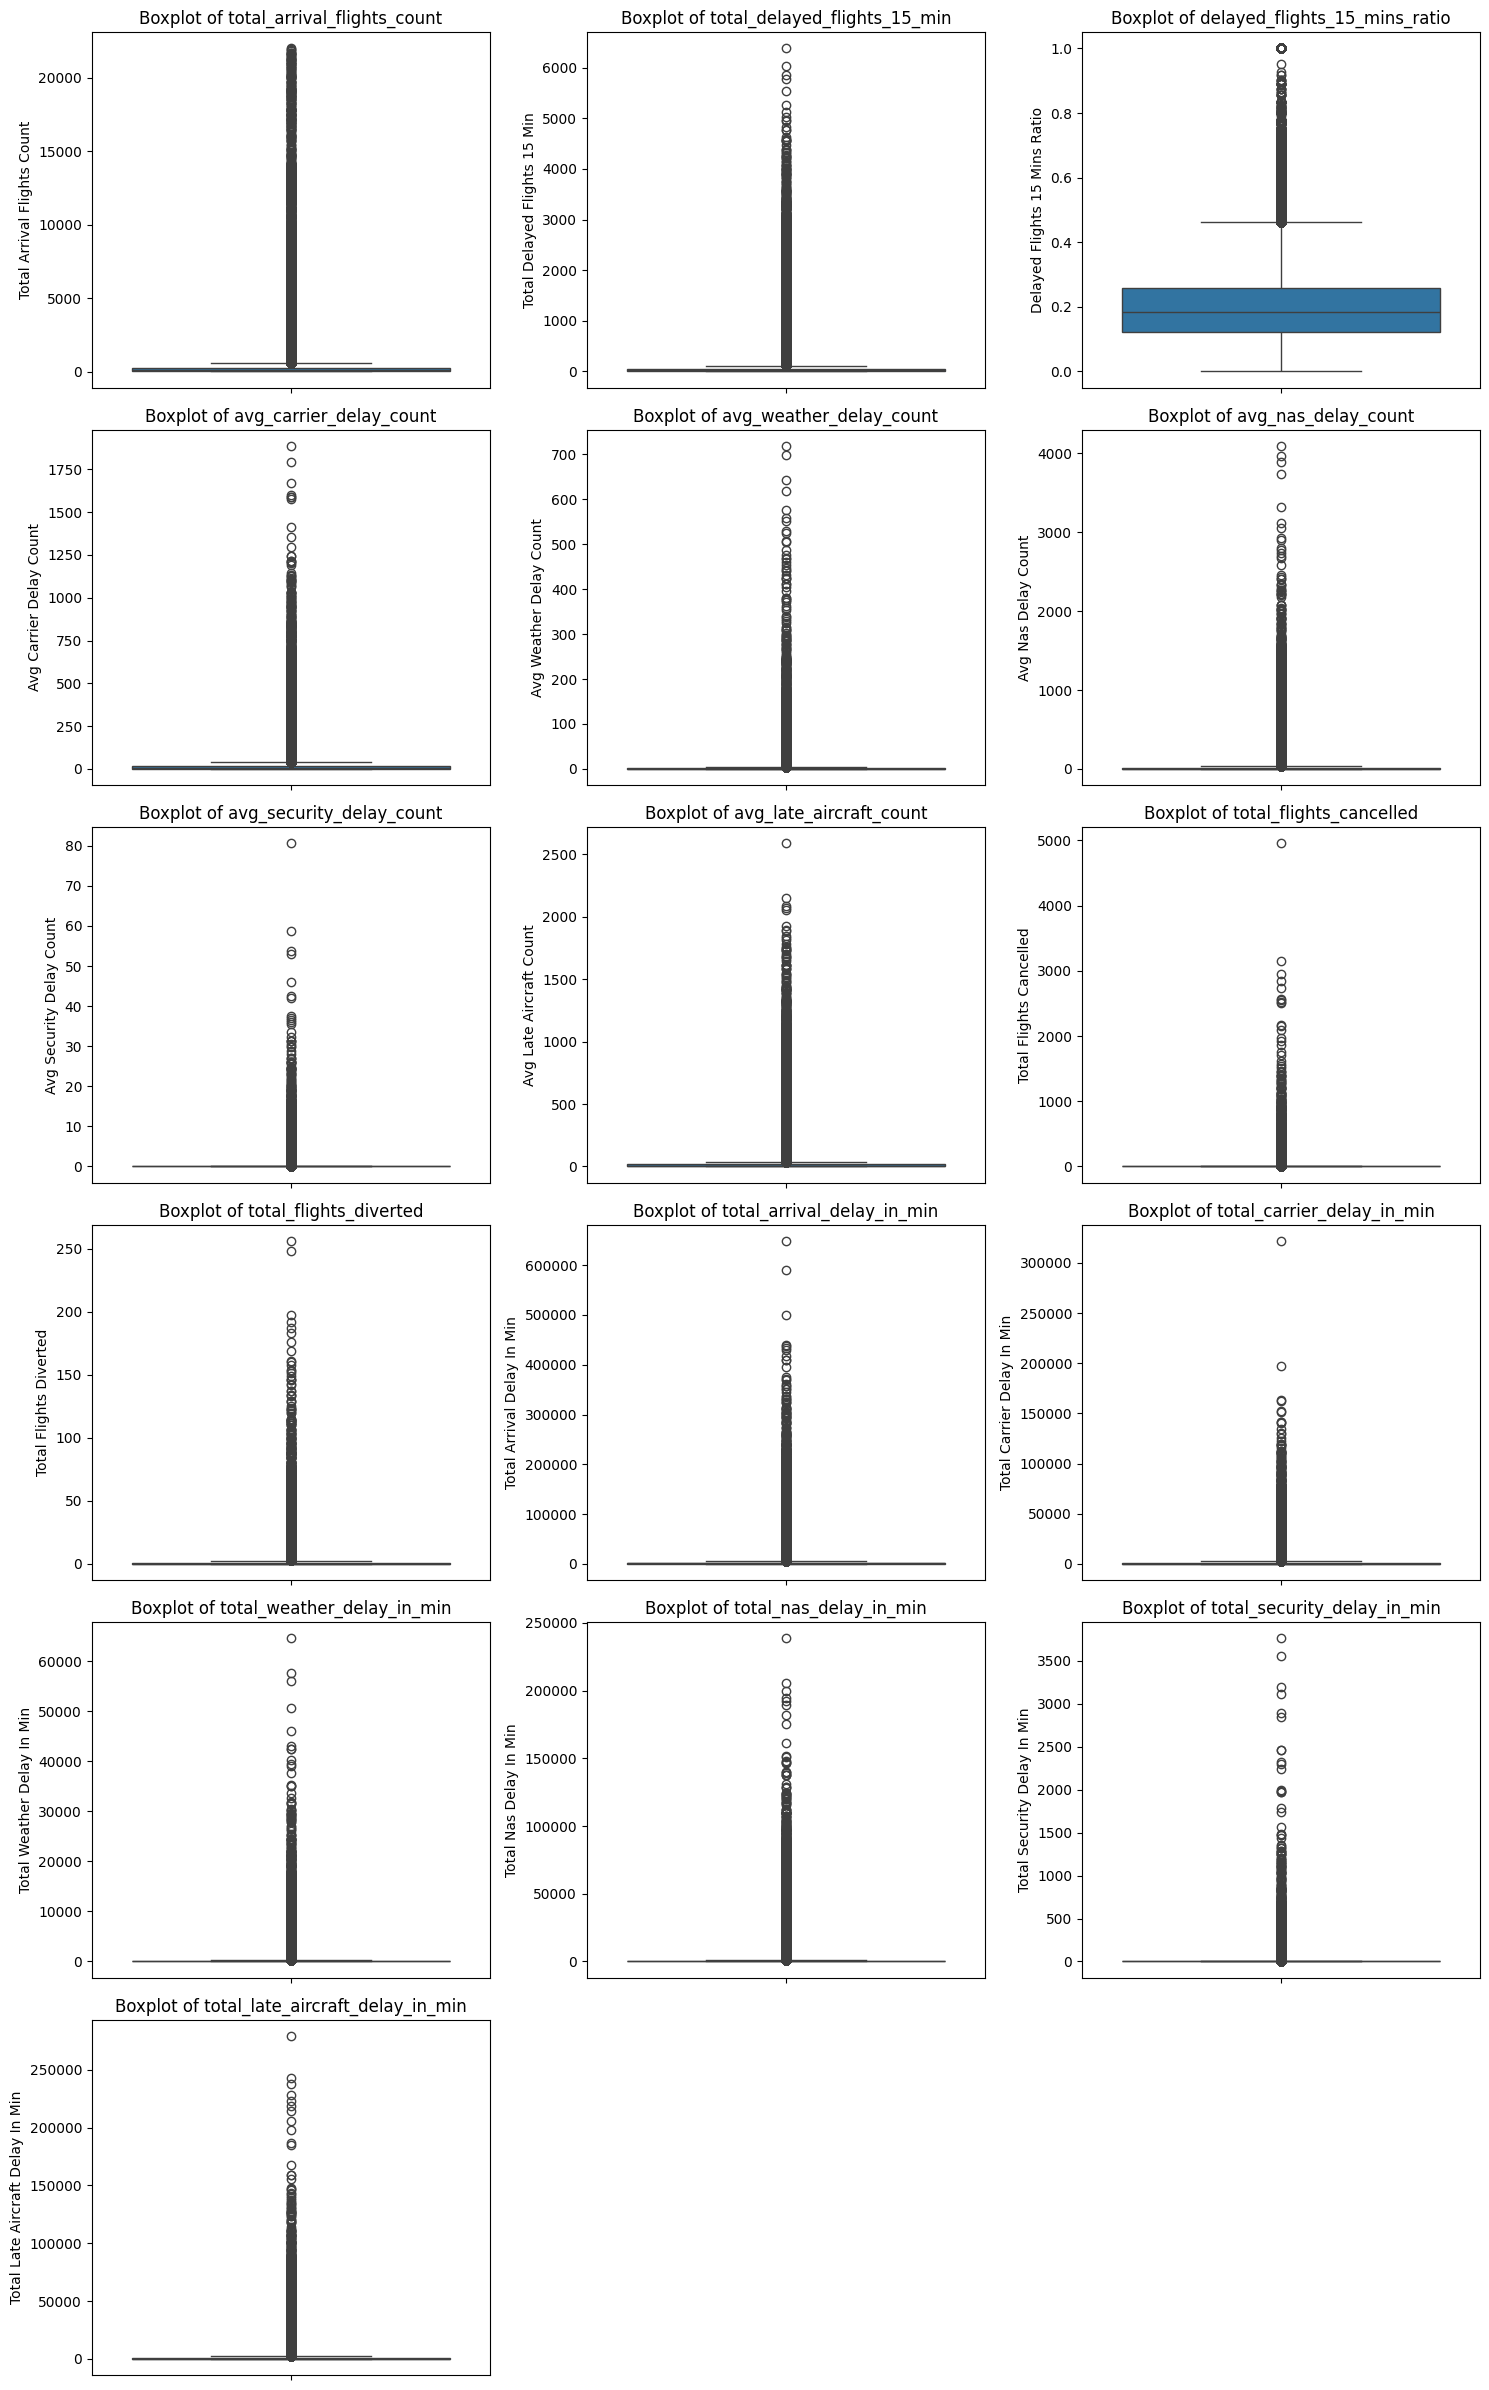

In [21]:
'''
Using a boxplot to check for outliers and distribution spread.
'''

# Number of rows and columns for the subplot grid
count_num_features = len(numeric_features)
cols = 3
rows = (count_num_features // cols) + (count_num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Loop over each feature and plot on the corresponding axis
for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    sns.boxplot(y=raw_data[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    y_label_name = ' '.join(word.capitalize() for word in feature.split('_'))
    ax.set_ylabel(y_label_name)

# Hide any unused axes
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

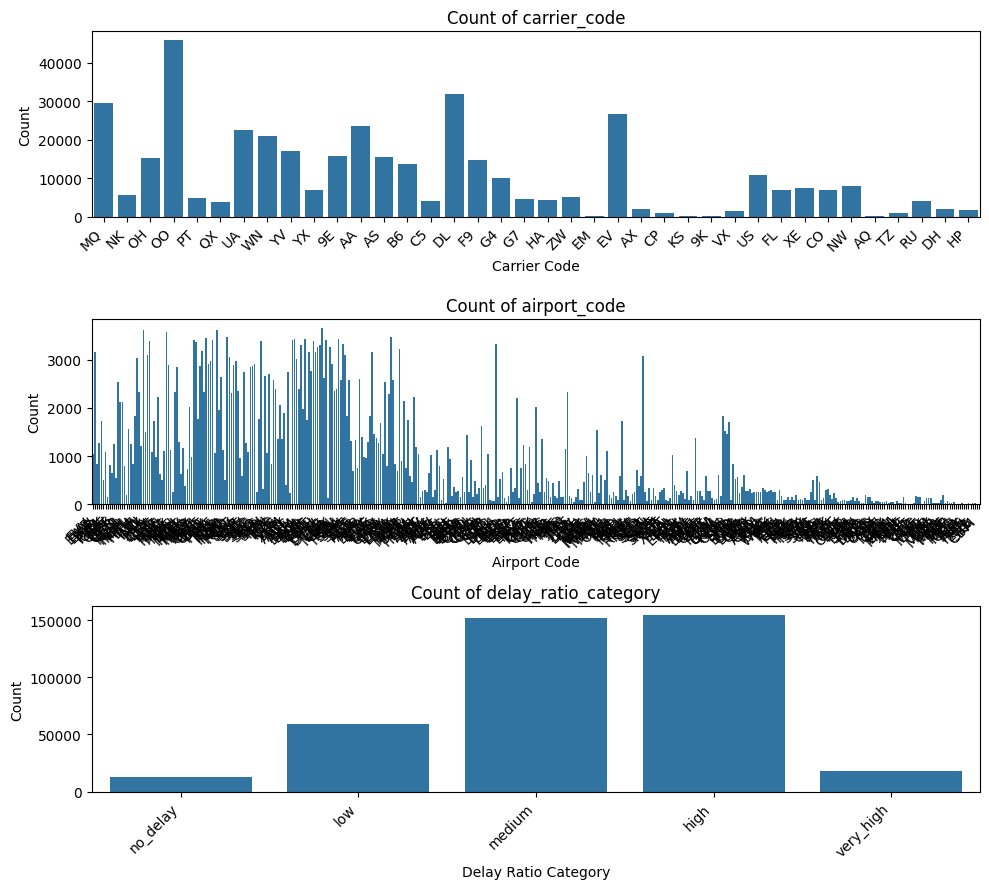

In [35]:
'''
Using a Countplot for categorical features
'''

# Number of rows and columns for the subplot grid
count_cat_features = len(categorical_features)
cols = 1
rows = (count_cat_features // cols) + (count_cat_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()

# Loop over each feature and plot on the corresponding axis
for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    sns.countplot(x=raw_data[feature], ax=ax)
    ax.set_title(f'Count of {feature}')
    x_label_name = ' '.join(word.capitalize() for word in feature.split('_'))
    ax.set_xlabel(x_label_name)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused axes
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [23]:
'''
Checking a number of unique values in categorical features
'''
for feature in ['carrier_code', 'carrier_name', 'airport_code', 'airport_name', 'delay_ratio_category']:
    unique_values = raw_data[feature].unique()
    print(f"Number of Unique values in '{feature}': {len(unique_values)}")

Number of Unique values in 'carrier_code': 38
Number of Unique values in 'carrier_name': 51
Number of Unique values in 'airport_code': 423
Number of Unique values in 'airport_name': 447
Number of Unique values in 'delay_ratio_category': 5


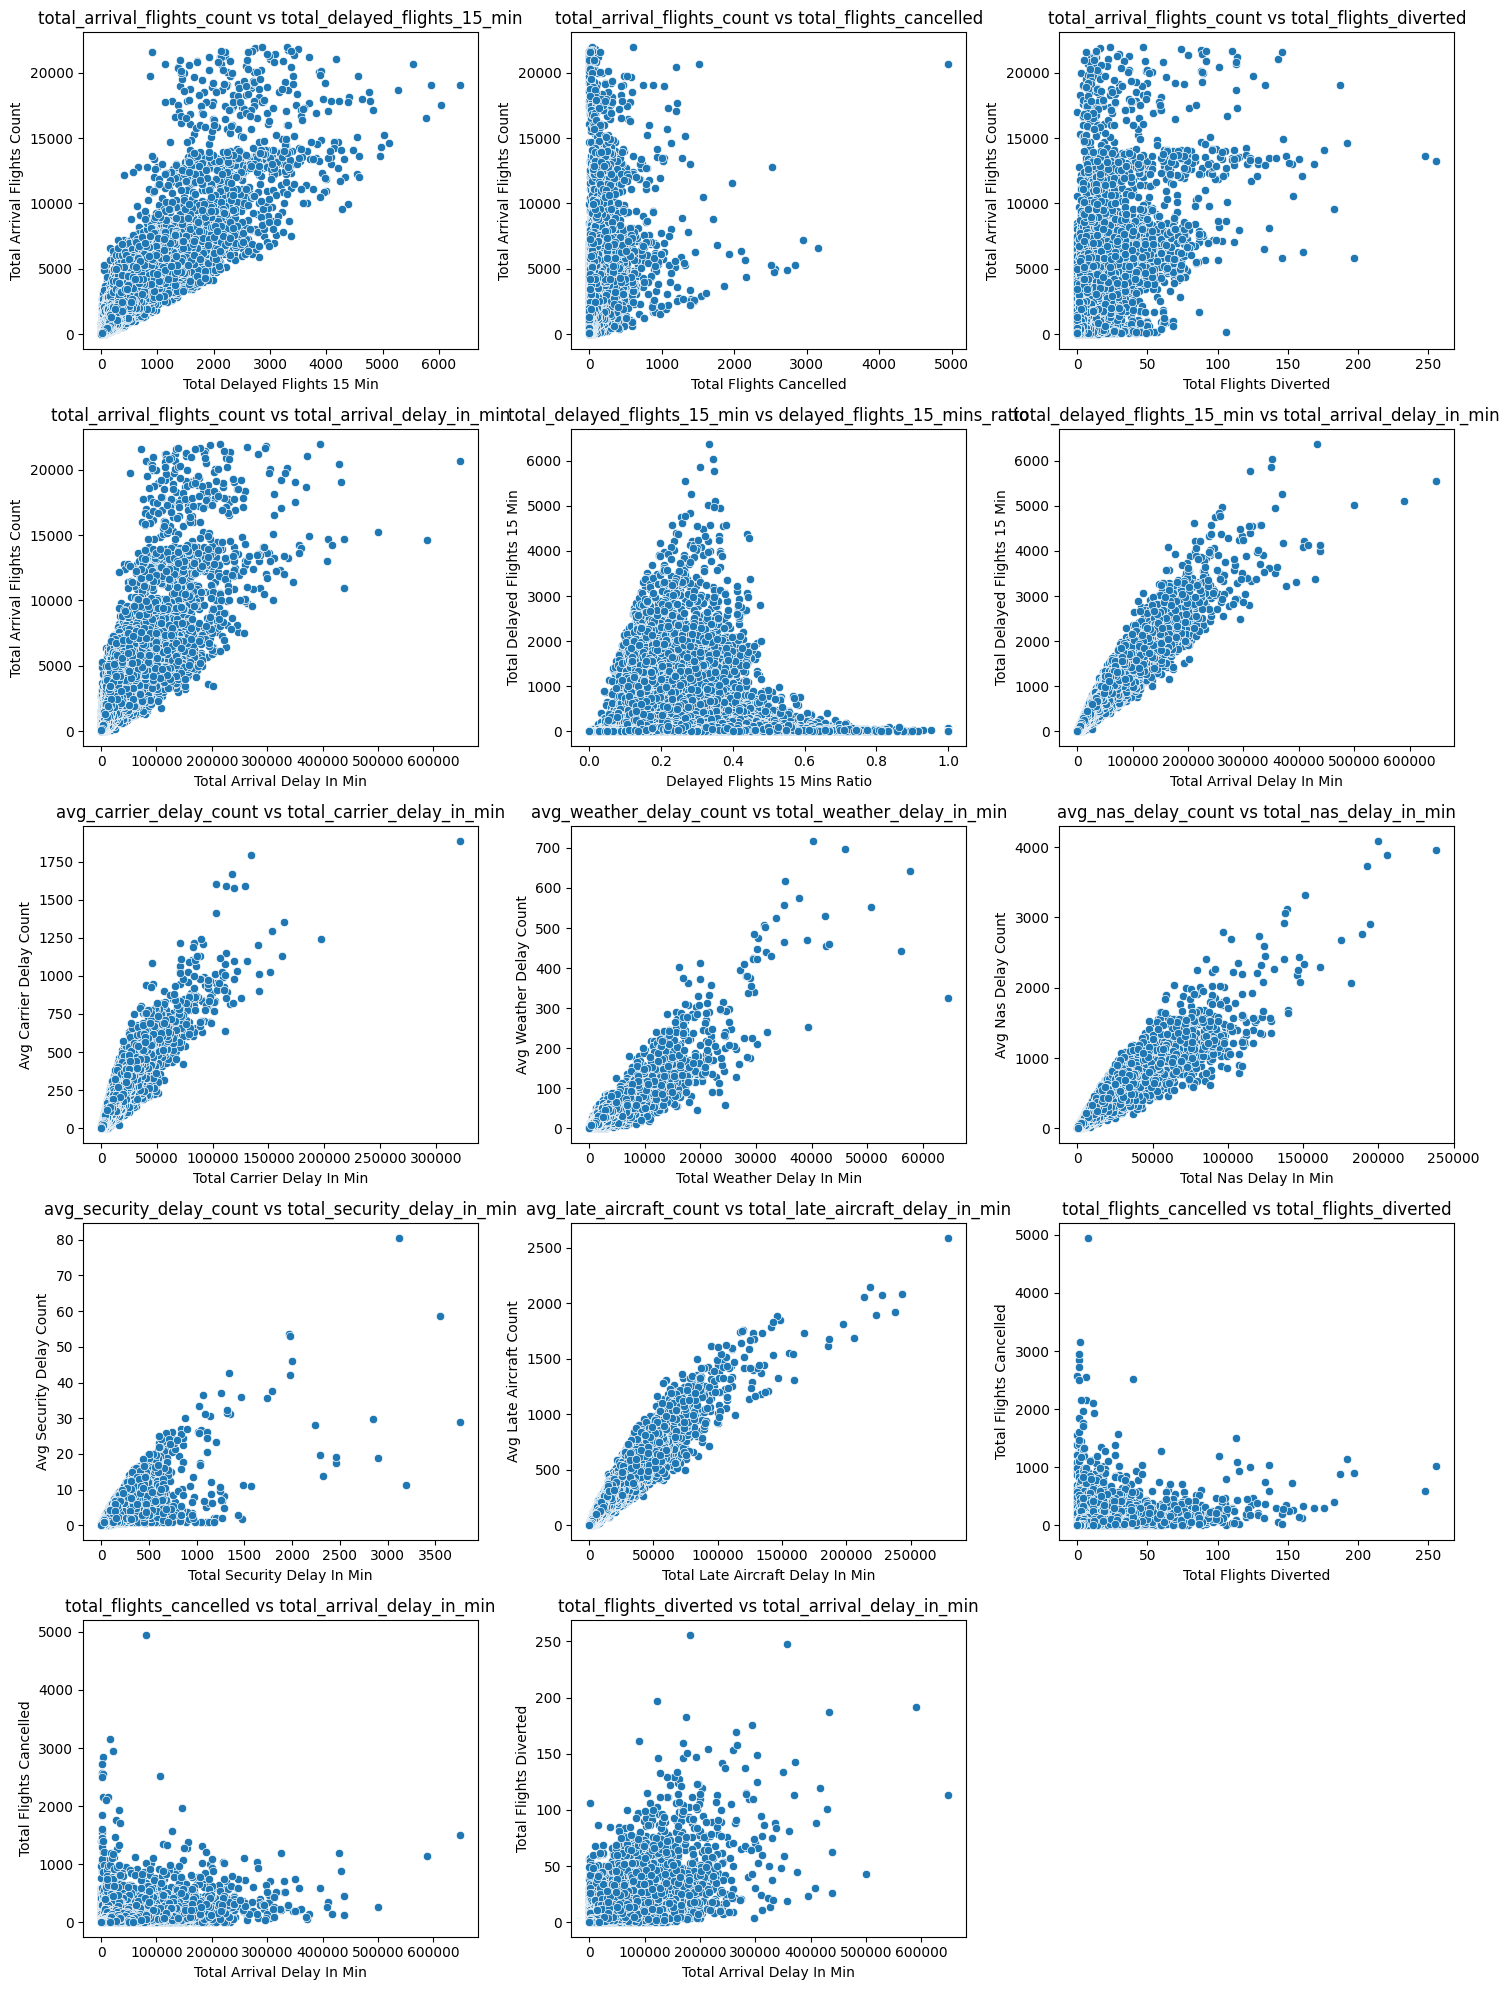

In [41]:
'''
Using a Scatter Plot to visualize the relationship between two continuous variables
'''

numeric_pairs = [('total_arrival_flights_count', 'total_delayed_flights_15_min'),  # Total flights vs delayed flights
                 ('total_arrival_flights_count', 'total_flights_cancelled'),  # Total flights vs cancelled flights
                 ('total_arrival_flights_count', 'total_flights_diverted'),  # Total flights vs diverted flights
                 ('total_arrival_flights_count', 'total_arrival_delay_in_min'),  # Total flights vs total arrival delay time
                 ('total_delayed_flights_15_min', 'delayed_flights_15_mins_ratio'),  # Delayed flights vs ratio of delayed flights
                 ('total_delayed_flights_15_min', 'total_arrival_delay_in_min'),  # Delayed flights vs total arrival delay time
                 ('avg_carrier_delay_count', 'total_carrier_delay_in_min'),  # Average carrier delay count vs total carrier delay time
                 ('avg_weather_delay_count', 'total_weather_delay_in_min'),  # Average weather delay count vs total weather delay time
                 ('avg_nas_delay_count', 'total_nas_delay_in_min'),  # Average NAS delay count vs total NAS delay time
                 ('avg_security_delay_count', 'total_security_delay_in_min'),  # Average security delay count vs total security delay time
                 ('avg_late_aircraft_count', 'total_late_aircraft_delay_in_min'),  # Average late aircraft count vs total late aircraft delay time
                 ('total_flights_cancelled', 'total_flights_diverted'),  # Cancelled flights vs diverted flights
                 ('total_flights_cancelled', 'total_arrival_delay_in_min'),  # Cancelled flights vs total arrival delay time
                 ('total_flights_diverted', 'total_arrival_delay_in_min')  # Diverted flights vs total arrival delay time
                ]

count_num_features = len(numeric_pairs)
cols = 3
rows = (count_num_features // cols) + (count_num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for idx, feature in enumerate(numeric_pairs):
    feature1, feature2 = feature
    ax = axes[idx]
    sns.scatterplot(x=raw_data[feature2], y=raw_data[feature1], ax=ax)
    ax.set_title(f'{feature1} vs {feature2}')
    y_label_name = ' '.join(word.capitalize() for word in feature1.split('_'))
    ax.set_ylabel(y_label_name)
    x_label_name = ' '.join(word.capitalize() for word in feature2.split('_'))
    ax.set_xlabel(x_label_name)

# Hide any unused axes
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

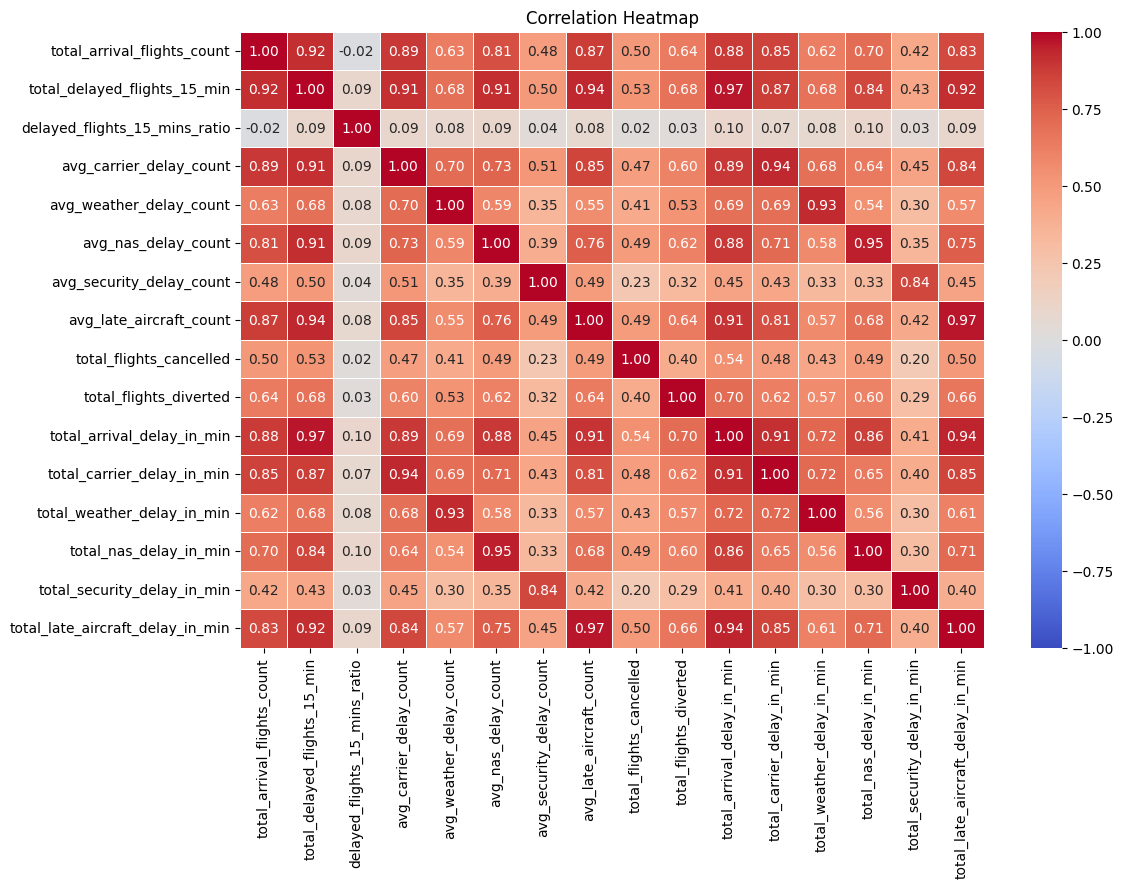

In [50]:
'''
Using a Correlation Heatmap to identify correlations between numerical features.
'''

correlation_matrix = raw_data[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix reveals strong connections between **total flights** and various delay types (e.g., carrier, weather, NAS). Notably, **late aircraft delays** show a very high correlation with total delay time. **Cancellations** and **diversions** have moderate correlations with delays, while **security delays** appear less significant.

Based on the correlation matrix, we can say the dataset exhibits **multicollinearity**. Many of the delay-related variables, such as **total_delayed_flights_15_min**, **avg_carrier_delay_count**, **total_carrier_delay_in_min**, and **total_weather_delay_in_min**, show strong correlations with each other. This suggests that these features are highly related and might lead to multicollinearity, which can affect the performance of ML models by inflating standard errors and making it difficult to interpret individual feature effects.

In [26]:
'''
Using a Bar Plot for comparing categorical vs. continuous variables.
'''

# plt.figure(figsize=(10, 6))
# sns.barplot(x=raw_data['delay_ratio_category'], y=raw_data['total_delayed_flights_15_min'])
# plt.title('Total Delayed Flights vs. Delay Ratio Category')
# plt.xlabel('Delay Ratio Category')
# plt.ylabel('Total Delayed Flights (15+ minutes)')
# plt.show()

categorical_features = ['carrier_code', 'delay_ratio_category']

'\nUsing a Bar Plot for comparing categorical vs. continuous variables.\n'

In [27]:
'''
Using a 3D Scatter Plot to visualize relationships between three continuous variables.
'''

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(raw_data['total_arrival_flights_count'], raw_data['total_delayed_flights_15_min'], raw_data['delayed_flights_15_mins_ratio'], c=raw_data['delayed_flights_15_mins_ratio'], cmap='viridis')
# ax.set_xlabel('Total Arrival Flights Count')
# ax.set_ylabel('Total Delayed Flights (15+ minutes)')
# ax.set_zlabel('Delayed Flights Ratio')
# plt.title('3D Scatter Plot of Total Arrival Flights, Delayed Flights, and Delay Ratio')
# plt.show()

'\nUsing 3D Scatter Plot to visualize relationships between three continuous variables.\n'

In [28]:
'''
Using a Pairplot to visualize pairwise relationships between multiple variables.
'''

# sns.pairplot(raw_data[['total_arrival_flights_count', 'total_delayed_flights_15_min', 'delayed_flights_15_mins_ratio', 
#                         'total_arrival_delay_in_min', 'total_carrier_delay_in_min']])
# plt.title('Pairplot of Key Numerical Features')
# plt.show()

'\nPairplot\nVisualize pairwise relationships between multiple variables.\n'

In [29]:
'''
Using a FacetGrid to plot relationships between multiple variables based on categories (e.g., delay categories)
'''

# g = sns.FacetGrid(raw_data, col="delay_ratio_category", height=5)
# g.map(sns.barplot, 'delay_ratio_category', 'total_carrier_delay_in_min', color='blue')
# g.map(sns.barplot, 'delay_ratio_category', 'total_weather_delay_in_min', color='orange')
# g.set_axis_labels('Delay Ratio Category', 'Total Delay in Minutes')
# plt.title('FacetGrid: Delay Ratio vs. Delay Types')
# plt.show()


'\nFacetGrid\nPlot relationships between multiple variables based on categories (e.g., delay categories)\n'

Here are **all possible data visualizations** you could explore using the columns in your dataset to gain insights into flight delays, trends, and patterns:

---

### **1. Time-Based Analysis (Year and Month)**:
   - **Line plot** of `total_arrival_flights_count` over time (`year`, `month`).
   - **Line plot** of `total_delayed_flights_15_min` over time to see overall delay trends across months and years.
   - **Stacked bar chart** comparing total delays (`total_carrier_delay_in_min`, `total_weather_delay_in_min`, etc.) over months or years.
   - **Heatmap** of `total_delayed_flights_15_min` or `total_arrival_delay_in_min` vs. `month` and `year` to identify seasonal patterns.

### **2. Carrier-Based Insights**:
   - **Bar chart** comparing total delays by `carrier_code` or `carrier_name` (e.g., `total_delayed_flights_15_min`, `total_arrival_delay_in_min`).
   - **Pie chart** showing the distribution of delays by carrier, highlighting which carrier causes more delays.
   - **Box plot** comparing `total_arrival_delay_in_min` or `avg_carrier_delay_count` by `carrier_code` to show delay distribution and outliers.

### **3. Airport-Based Insights**:
   - **Bar chart** comparing `total_arrival_flights_count` and `total_delayed_flights_15_min` for different airports (`airport_code` or `airport_name`).
   - **Scatter plot** of `total_arrival_flights_count` vs. `total_delayed_flights_15_min` by `airport_code` to understand delay rates by airport.
   - **Heatmap** showing `avg_carrier_delay_count`, `avg_weather_delay_count`, etc., for each airport over time.

### **4. Delay Analysis**:
   - **Stacked bar chart** showing delays by cause (e.g., `total_carrier_delay_in_min`, `total_weather_delay_in_min`, etc.) for different months/years.
   - **Correlation heatmap** between various delay types (`total_carrier_delay_in_min`, `total_weather_delay_in_min`, etc.) to examine relationships and dependencies.
   - **Box plot** to compare the distribution of delays (`total_arrival_delay_in_min`, `total_carrier_delay_in_min`, etc.) by month.

### **5. Delay Ratio Analysis**:
   - **Histogram** of `delayed_flights_15_mins_ratio` to understand the distribution of delays as a percentage of total flights.
   - **Bar chart** of `delay_ratio_category` showing the count of flights in each category (e.g., no delay, low, medium, high).
   - **Scatter plot** of `delayed_flights_15_mins_ratio` vs. `total_arrival_flights_count` to see if there is a relationship between the number of flights and delay ratio.

### **6. Cancellations and Diversions**:
   - **Bar chart** comparing `total_flights_cancelled` vs. `total_flights_diverted`.
   - **Stacked bar chart** of `total_flights_cancelled` and `total_flights_diverted` by `airport_code` or `carrier_code`.
   - **Pie chart** showing the proportion of flights that are canceled, diverted, or on-time based on `total_flights_cancelled` and `total_flights_diverted`.

### **7. Comparative Analysis**:
   - **Pairplot** to visualize relationships between multiple numerical variables like `total_arrival_delay_in_min`, `total_carrier_delay_in_min`, `total_weather_delay_in_min`, etc.
   - **Bubble chart** with `airport_code` on the x-axis, `carrier_code` on the y-axis, and the size representing `total_arrival_flights_count` or `total_delayed_flights_15_min`.
   - **Scatter plot matrix** of different delay types (e.g., `total_carrier_delay_in_min`, `total_weather_delay_in_min`, etc.) to spot patterns and correlations.

### **8. Performance by Month and Year**:
   - **Stacked bar chart** showing performance by month (e.g., breakdown of `total_delayed_flights_15_min`, `total_flights_cancelled`, `total_flights_diverted`, etc.).
   - **Line plot** of `avg_carrier_delay_count`, `avg_weather_delay_count`, etc., to observe trends over time for individual carriers and airports.

### **9. Delay Causes Analysis**:
   - **Stacked bar plot** for `avg_carrier_delay_count`, `avg_weather_delay_count`, etc., for each month or year.
   - **Pie chart** of the percentage contribution of each delay type to `arr_delay` for different carriers or airports.

### **10. Delay Category Insights**:
   - **Countplot** for `delay_ratio_category` to show how the delay ratios are distributed across the dataset.
   - **Grouped bar chart** comparing the mean or median of delays (`total_arrival_delay_in_min`, `total_carrier_delay_in_min`, etc.) for each `delay_ratio_category`.

---

### **Additional Visualizations for Specific Insights**:
   - **Time series** of `total_arrival_delay_in_min` by month for each carrier, airport, or delay category.
   - **Radar chart** for comparing delay types (carrier, weather, NAS, security, and late aircraft) for different carriers or airports.
   - **Scatter plot** of `total_arrival_flights_count` vs. `total_delayed_flights_15_min` to visualize the relationship between flight count and delays.

By using these visualizations, you can gain deep insights into the **patterns of delays**, **carrier/airport performance**, **factors influencing delays**, and **overall trends** in the dataset.

In [ ]:
'''
Feature Selection (e.g., Recursive Feature Elimination):
Use RFE to select important features:
'''

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# selector = RFE(model, n_features_to_select=10)  # Adjust based on the number of features you want to keep
# X_selected = selector.fit_transform(X, y)
